<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-analysis-of-movies-from-TMDB-data" data-toc-modified-id="The-analysis-of-movies-from-TMDB-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The analysis of movies from TMDB data</a></span></li><li><span><a href="#Imports-and-initialization" data-toc-modified-id="Imports-and-initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and initialization</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Choose-only-required-columns" data-toc-modified-id="Choose-only-required-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choose only required columns</a></span></li><li><span><a href="#Dealing-with-duplicated-data" data-toc-modified-id="Dealing-with-duplicated-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dealing with duplicated data</a></span></li><li><span><a href="#Check-for-NaNs" data-toc-modified-id="Check-for-NaNs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Check for NaNs</a></span></li><li><span><a href="#Create-and-drop-columns" data-toc-modified-id="Create-and-drop-columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create and drop columns</a></span></li><li><span><a href="#Find-top-20-most-expensive-budget-movies." data-toc-modified-id="Find-top-20-most-expensive-budget-movies.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Find top 20 most expensive budget movies.</a></span></li><li><span><a href="#Top-20-most-profitable-movies" data-toc-modified-id="Top-20-most-profitable-movies-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Top 20 most profitable movies</a></span></li><li><span><a href="#Compare-most-expensive--and-most-profittable-movies" data-toc-modified-id="Compare-most-expensive--and-most-profittable-movies-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Compare most expensive  and most profittable movies</a></span></li><li><span><a href="#Top-20-most-liked-movies" data-toc-modified-id="Top-20-most-liked-movies-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Top 20 most liked movies</a></span></li><li><span><a href="#Favorite-month-to-release-the-movie" data-toc-modified-id="Favorite-month-to-release-the-movie-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Favorite month to release the movie</a></span></li><li><span><a href="#Budget-vs-Revenue" data-toc-modified-id="Budget-vs-Revenue-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Budget vs Revenue</a></span></li><li><span><a href="#Budget-vs-Rating" data-toc-modified-id="Budget-vs-Rating-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Budget vs Rating</a></span></li><li><span><a href="#Number-of-movies-per-year" data-toc-modified-id="Number-of-movies-per-year-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Number of movies per year</a></span></li><li><span><a href="#Analyzing-the-Genre" data-toc-modified-id="Analyzing-the-Genre-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Analyzing the Genre</a></span></li><li><span><a href="#Genre-vs-budget" data-toc-modified-id="Genre-vs-budget-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Genre vs budget</a></span></li></ul></div>

__Author__ = Bhishan Poudel  
__Date__   = Sep 1, 2018

# The analysis of movies from TMDB data

Useful resources:  
https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

Data source: https://www.kaggle.com/tmdb

**Goal**
+ Find top 20 budget, profit, and rating
  - Find top 20 most expensive movies.
  - Find top 20 highest profitable movies.
  - Find top 20 highest rated movies.
+ Find which month has the most release.
+ Find number of production of movies by year.
+ Find which genre is the most popular.
  - Find the total count of the genres for movies.
  - Find the total budget per genre.

**Results**
![](results/top20_budget.png)
![](results/top20_profit.png)
![](results/top20_rating.png)

![](results/montly_release.png)

![](results/growth_over_year.png)
![](results/movie_growth.png)

![](results/genre_counts.png)
![](results/genre_vs_budget.png)

# Imports and initialization


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

# Load the data

In [4]:
df = pd.read_csv('data/tmdb.csv',parse_dates=True)
df.head(2)
# df.info();

# Always describe the data after loading to look for counts of all cols
print(df.shape)
df.head(1)

# all numerical cols have same counts, it does not tell about nans and duplicates
# so we will find than after this.

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


# Choose only required columns

In [5]:
# columns
df.columns.values

# choose only some cols
cols = ['id', 'imdb_id', 'budget','revenue', 'original_title', 'director', 
        'runtime','genres', 'release_date', 'vote_average','release_year']
df = df[cols]
df.shape

(10866, 11)

# Dealing with duplicated data

In [6]:
sum(df.duplicated(['id','imdb_id']))
# sum wil be one if there are any duplicates

1

In [7]:
duped_movie_id = pd.concat(g for _, g in df.groupby(
    ["id"]) if len(g) > 1)

print(duped_movie_id.shape)
duped_movie_id

(2, 11)


,id,imdb_id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
2089,42194,tt0411951,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,5.0,2010
2090,42194,tt0411951,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,5.0,2010


In [8]:
# df = df[~df.duplicated(['id','imdb_id'])]
df = df.drop_duplicates(['id','imdb_id'])

In [9]:
sum(df.duplicated(['id','imdb_id']))
# sum is 0 means there are no id or imdb_id duplicates

0

In [10]:
# duplicate movie names
# There are many movies with same name
# Some movies have names like "1" and "9".
duped_movie_names = pd.concat(g for _, g in df.groupby(
    ["original_title"]) if len(g) > 1)[
    ['original_title','director','release_date']]

print(duped_movie_names.shape)
duped_movie_names.head()

# 572/2 = 286 movies names are duplicated

(570, 3)


,original_title,director,release_date
5724,1,Paul Crowder,9/30/13
5748,1,Dennis Iliadis,9/20/13
1400,9,Shane Acker,8/19/09
6514,9,Shane Acker,4/21/05
1416,A Christmas Carol,Robert Zemeckis,11/4/09


In [11]:
# Change the names of duplicated movie-names
# Zulu ==> Zulu_1_22_64

df['movie_name'] = df.original_title + ' by ' + df.director
df.movie_name;

# recheck 
pd.concat(g for _, g in df.groupby(
    ["movie_name"]) if len(g) > 1)[['movie_name',
                                        'director','release_date']]

# 5 directers have created same named movie twice
# one movie name is repeated

,movie_name,director,release_date
1400,9 by Shane Acker,Shane Acker,8/19/09
6514,9 by Shane Acker,Shane Acker,4/21/05
4337,Bottle Rocket by Wes Anderson,Wes Anderson,1/20/94
8547,Bottle Rocket by Wes Anderson,Wes Anderson,2/21/96
4451,Frankenweenie by Tim Burton,Tim Burton,10/4/12
7943,Frankenweenie by Tim Burton,Tim Burton,12/14/84
4063,Madea's Family Reunion by Tyler Perry,Tyler Perry,1/25/02
6701,Madea's Family Reunion by Tyler Perry,Tyler Perry,2/24/06
5202,Saw by James Wan,James Wan,1/1/03
7011,Saw by James Wan,James Wan,10/1/04


In [12]:
df['movie_name_unique'] = df.original_title + ' by ' + df.director + ' at ' + df.release_date

# df['movie_name_unique'].head()
pd.concat(g for _, g in df.groupby(
    ["movie_name"]) if len(g) > 1)[['movie_name',
                                        'director','release_date','movie_name_unique']]

,movie_name,director,release_date,movie_name_unique
1400,9 by Shane Acker,Shane Acker,8/19/09,9 by Shane Acker at 8/19/09
6514,9 by Shane Acker,Shane Acker,4/21/05,9 by Shane Acker at 4/21/05
4337,Bottle Rocket by Wes Anderson,Wes Anderson,1/20/94,Bottle Rocket by Wes Anderson at 1/20/94
8547,Bottle Rocket by Wes Anderson,Wes Anderson,2/21/96,Bottle Rocket by Wes Anderson at 2/21/96
4451,Frankenweenie by Tim Burton,Tim Burton,10/4/12,Frankenweenie by Tim Burton at 10/4/12
7943,Frankenweenie by Tim Burton,Tim Burton,12/14/84,Frankenweenie by Tim Burton at 12/14/84
4063,Madea's Family Reunion by Tyler Perry,Tyler Perry,1/25/02,Madea's Family Reunion by Tyler Perry at 1/25/02
6701,Madea's Family Reunion by Tyler Perry,Tyler Perry,2/24/06,Madea's Family Reunion by Tyler Perry at 2/24/06
5202,Saw by James Wan,James Wan,1/1/03,Saw by James Wan at 1/1/03
7011,Saw by James Wan,James Wan,10/1/04,Saw by James Wan at 10/1/04


# Check for NaNs

In [13]:
print(df.shape)
df.head(2)

(10865, 13)


,id,imdb_id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,Jurassic World by Colin Trevorrow,Jurassic World by Colin Trevorrow at 6/9/15
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,Mad Max: Fury Road by George Miller,Mad Max: Fury Road by George Miller at 5/13/15


In [14]:
# Find total number of nans in columns
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

imdb_id              10
director             44
genres               23
movie_name           44
movie_name_unique    44
dtype: int64

In [15]:
df.isnull().sum().sum() # there are 165 nans total

165

In [16]:
# nan rows of imdb id
# not all the tmdb has imdb id number, so we can safely drop this column 
# from our data.
nan_rows = df[df['imdb_id'].isnull()]
nan_rows

,id,imdb_id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique
548,355131,NaN,0,0,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,8/10/15,7.5,2015,NaN,NaN
997,287663,NaN,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,6.8,2014,Star Wars Rebels: Spark of Rebellion by Stewar...,Star Wars Rebels: Spark of Rebellion by Stewar...
1528,15257,NaN,0,0,Hulk vs. Wolverine,Frank Paur,38,Animation|Action|Science Fiction,1/27/09,6.9,2009,Hulk vs. Wolverine by Frank Paur,Hulk vs. Wolverine by Frank Paur at 1/27/09
1750,101907,NaN,0,0,Hulk vs. Thor,Sam Liu,41,Action|Animation|Fantasy|Science Fiction,1/27/09,6.4,2009,Hulk vs. Thor by Sam Liu,Hulk vs. Thor by Sam Liu at 1/27/09
2401,45644,NaN,0,0,Opeth: In Live Concert At The Royal Albert Hall,NaN,163,Music,9/21/10,8.6,2010,NaN,NaN
4797,369145,NaN,0,0,Doctor Who: The Snowmen,NaN,60,NaN,12/25/12,7.8,2012,NaN,NaN
4872,269177,NaN,0,0,Party Bercy,NaN,120,Comedy,9/23/12,6.4,2012,NaN,NaN
6071,279954,NaN,500,0,Portal: Survive!,Connor McGuire|Colin McGuire,7,Action|Science Fiction,10/8/13,7.5,2013,Portal: Survive! by Connor McGuire|Colin McGuire,Portal: Survive! by Connor McGuire|Colin McGui...
7527,50127,NaN,0,0,Fallen: The Journey,Mikael Salomon,80,Action|Adventure|Drama|Fantasy|Family,1/1/07,7.3,2007,Fallen: The Journey by Mikael Salomon,Fallen: The Journey by Mikael Salomon at 1/1/07
7809,50128,NaN,0,0,Fallen: The Destiny,Mikael Salomon,80,Adventure|Fantasy|Drama|Action|Science Fiction,1/1/07,7.0,2007,Fallen: The Destiny by Mikael Salomon,Fallen: The Destiny by Mikael Salomon at 1/1/07


In [17]:
df = df.drop(['imdb_id'],axis=1)
nan_rows = df[df['director'].isnull()]
print(nan_rows.shape)
nan_rows

# in this database some movies (eg. hindi movie Paa) do not have the director
# name in 44 movies.

(44, 12)


,id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique
532,320996,0,0,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,1/23/15,6.6,2015,NaN,NaN
548,355131,0,0,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,8/10/15,7.5,2015,NaN,NaN
556,321160,0,0,With This Ring,NaN,105,Comedy|Romance,1/24/15,6.5,2015,NaN,NaN
1032,259910,0,0,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,3/18/14,6.3,2014,NaN,NaN
1054,253675,0,0,Unlocking Sherlock,NaN,60,TV Movie|Documentary,1/19/14,7.2,2014,NaN,NaN
1203,256561,150000,0,Free to Play,NaN,75,Documentary,3/19/14,7.0,2014,NaN,NaN
1241,296370,0,0,Dance-Off,NaN,0,Romance|Music|Comedy,1/1/14,5.7,2014,NaN,NaN
1288,301235,0,0,Top Gear: The Perfect Road Trip 2,NaN,94,Documentary,11/17/14,6.8,2014,NaN,NaN
1852,133365,0,0,The Diary of Anne Frank,NaN,100,Drama,1/9/09,7.5,2009,NaN,NaN
1872,26379,3250000,0,Paa,NaN,133,Drama|Family|Foreign,12/4/09,6.1,2009,NaN,NaN


In [18]:
nan_rows = df[df['genres'].isnull()]
print(nan_rows.shape)
nan_rows

# 23 movies do not have genres. some of them also do not have director names.
# We can keep these data, they will not our goals in this project.

(23, 12)


,id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique
424,363869,0,0,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,6.1,2015,Belli di papÃ by Guido Chiesa,Belli di papÃ by Guido Chiesa at 10/29/15
620,361043,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,5.0,2015,All Hallows' Eve 2 by Antonio Padovan|Bryan No...,All Hallows' Eve 2 by Antonio Padovan|Bryan No...
997,287663,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,6.8,2014,Star Wars Rebels: Spark of Rebellion by Stewar...,Star Wars Rebels: Spark of Rebellion by Stewar...
1712,21634,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,7.4,2009,Prayers for Bobby by Russell Mulcahy,Prayers for Bobby by Russell Mulcahy at 2/27/09
1897,40534,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,7.0,2009,Jonas Brothers: The Concert Experience by Bruc...,Jonas Brothers: The Concert Experience by Bruc...
2370,127717,0,0,Freshman Father,Michael Scott,0,NaN,6/5/10,5.8,2010,Freshman Father by Michael Scott,Freshman Father by Michael Scott at 6/5/10
2376,315620,0,0,Doctor Who: A Christmas Carol,NaN,62,NaN,12/25/10,7.7,2010,NaN,NaN
2853,57892,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,7.2,2001,Vizontele by YÄ±lmaz ErdoÄŸan,Vizontele by YÄ±lmaz ErdoÄŸan at 2/2/01
3279,54330,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,8/13/08,6.1,2008,ì•„ê¸°ì™€ ë‚˜ by Kim Jin-Yeong,ì•„ê¸°ì™€ ë‚˜ by Kim Jin-Yeong at 8/13/08
4547,123024,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,7/27/12,8.3,2012,London 2012 Olympic Opening Ceremony: Isles of...,London 2012 Olympic Opening Ceremony: Isles of...


# Create and drop columns

In [19]:
# add profit column
df['profit'] = df['revenue'] - df['budget']

# add release month column
# https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df['release_month'] = df['release_date'].dt.month
df['month_name'] = df['release_month'].apply(lambda x: calendar.month_abbr[x])



df.head(2)

,id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique,profit,release_month,month_name
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,Jurassic World by Colin Trevorrow,Jurassic World by Colin Trevorrow at 6/9/15,1363528810,6,Jun
1,76341,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,Mad Max: Fury Road by George Miller,Mad Max: Fury Road by George Miller at 5/13/15,228436354,5,May


# Find top 20 most expensive budget movies.

In [20]:
# Find top 20 big budget movies
# Note: ascending=True will make the plot decreasing from top
budget20 = df.nlargest(20, 'budget')
budget20 = budget20[['original_title', 'budget']].\
                       sort_values(by='budget',ascending=True).\
                       reset_index().drop(['index'], axis=1)
budget20;

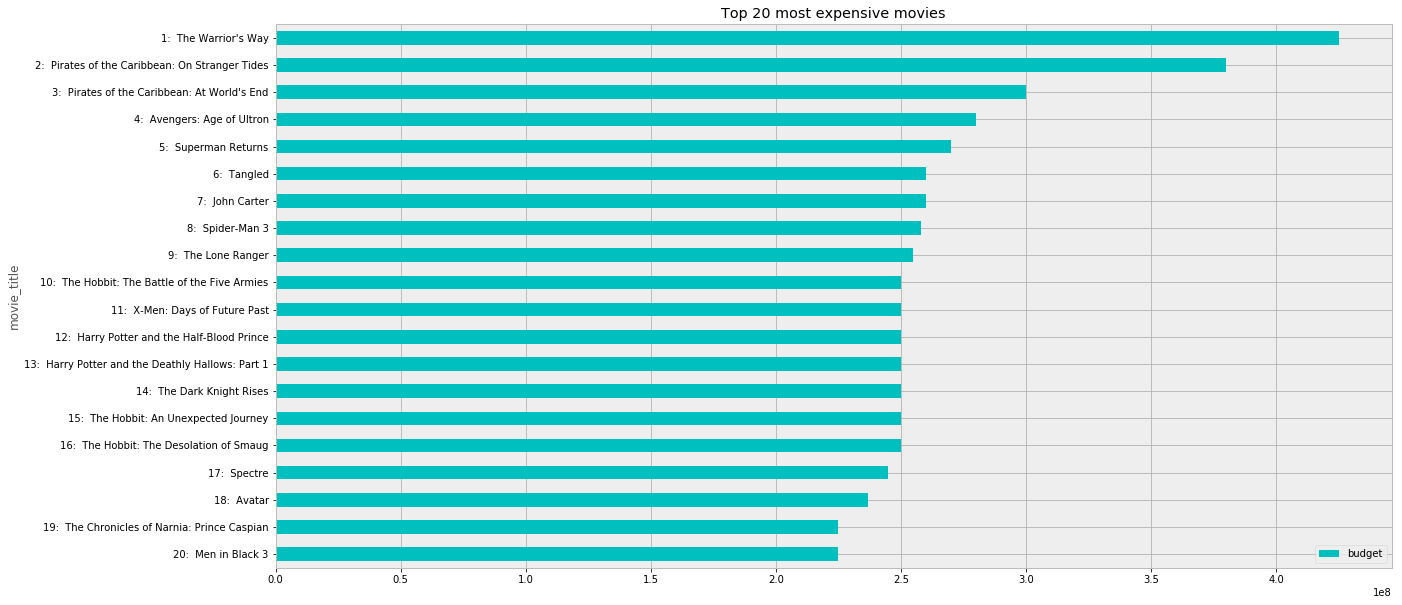

In [21]:
rev_idx = list(range(len(budget20.original_title.values)))[::-1]
budget20['movie_title'] = [str(rev_idx[i]+1) + ':  ' + j for (i,j) in enumerate(budget20.original_title)]
budget20.plot(x='movie_title',
              y='budget',
              kind='barh',
              title='Top 20 most expensive movies',
              figsize=(20, 10),
              stacked=True,
              color='c',
              )

# Top 20 most profitable movies

In [22]:
profit20 = df.nlargest(20, 'profit')
profit20 = profit20[['original_title', 'profit']].\
                       sort_values(by='profit',ascending=True).\
                       reset_index().drop(['index'], axis=1)
profit20;

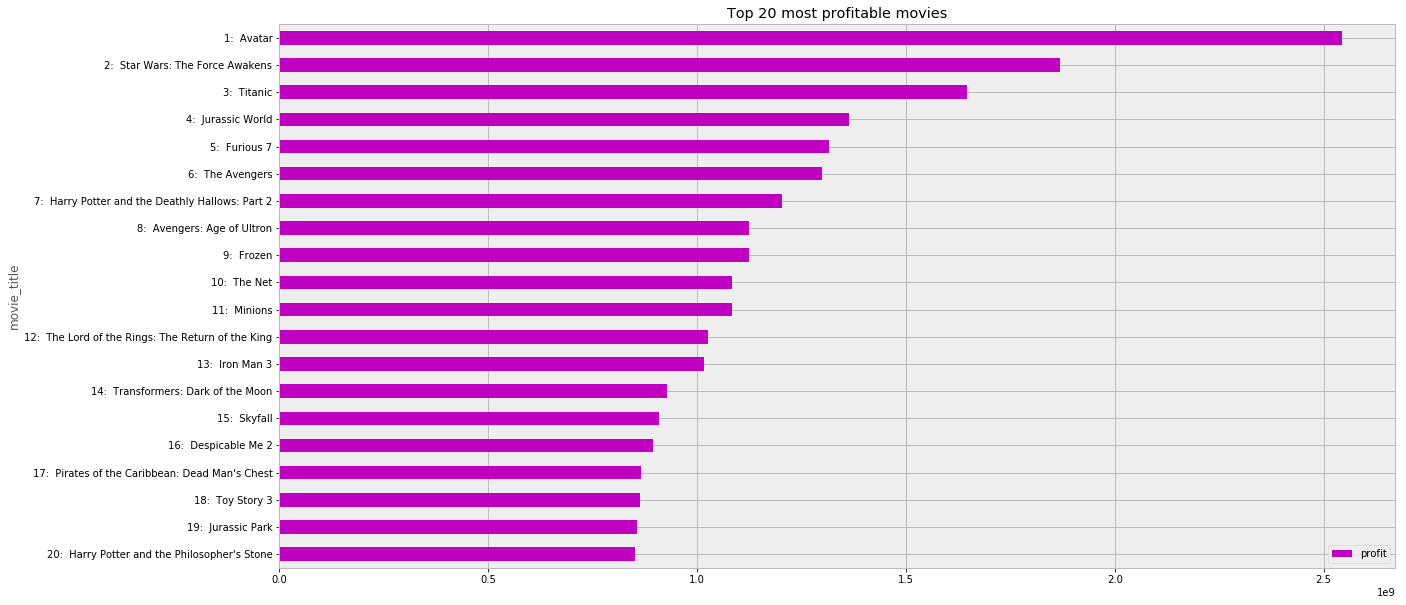

In [23]:
rev_idx = list(range(len(profit20.original_title.values)))[::-1]
profit20['movie_title'] = [str(rev_idx[i]+1) + ':  ' + j for (i,j) in enumerate(profit20.original_title)]
profit20.plot(x='movie_title',
              y='profit',
              kind='barh',
              title='Top 20 most profitable movies',
              figsize=(20, 10),
              stacked=True,
              color='m',
              )

# Compare most expensive  and most profittable movies

In [24]:
budpro = pd.DataFrame({'movie_budget': budget20.original_title,
                       'budget': budget20.budget,
                       'movie_profit': profit20.original_title,
                       'profit': profit20.profit}).\
                       sort_values(by='budget',ascending=False).\
                       reset_index().drop(['index'], axis=1)
                       
budpro

,movie_budget,budget,movie_profit,profit
0,The Warrior's Way,425000000,Avatar,2544505847
1,Pirates of the Caribbean: On Stranger Tides,380000000,Star Wars: The Force Awakens,1868178225
2,Pirates of the Caribbean: At World's End,300000000,Titanic,1645034188
3,Avengers: Age of Ultron,280000000,Jurassic World,1363528810
4,Superman Returns,270000000,Furious 7,1316249360
5,Tangled,260000000,The Avengers,1299557910
6,John Carter,260000000,Harry Potter and the Deathly Hallows: Part 2,1202817822
7,Spider-Man 3,258000000,Avengers: Age of Ultron,1125035767
8,The Lone Ranger,255000000,Frozen,1124219009
9,The Hobbit: The Battle of the Five Armies,250000000,The Net,1084279658


# Top 20 most liked movies

In [25]:
vote_average20 = df.nlargest(20, 'vote_average')
vote_average20 = vote_average20[['original_title', 'vote_average']].\
                       sort_values(by='vote_average',ascending=True).\
                       reset_index().drop(['index'], axis=1)
vote_average20

,original_title,vote_average
0,Stop Making Sense,8.4
1,Tropico,8.4
2,The Shawshank Redemption,8.4
3,Foo Fighters: Live at Wembley Stadium,8.4
4,The Making of The Walking Dead,8.4
5,Rush: Beyond the Lighted Stage,8.4
6,The Jinx: The Life and Deaths of Robert Durst,8.4
7,"Guten Tag, RamÃ³n",8.4
8,Dave Chappelle: Killin' Them Softly,8.5
9,Queen - Rock Montreal,8.5


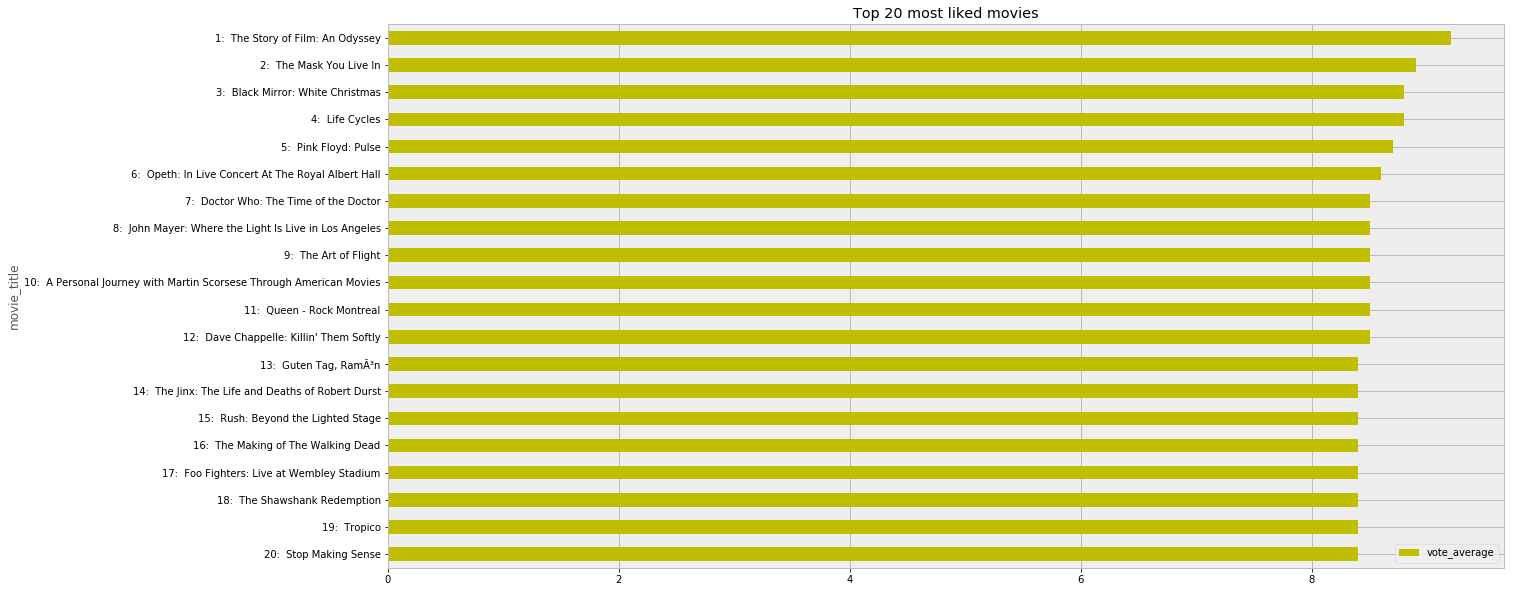

In [26]:
rev_idx = list(range(len(vote_average20.original_title.values)))[::-1]
vote_average20['movie_title'] = [str(rev_idx[i]+1) + ':  ' + j for (i,j) in enumerate(vote_average20.original_title)]
vote_average20.plot(x='movie_title',
              y='vote_average',
              kind='barh',
              title='Top 20 most liked movies',
              figsize=(20, 10),
              stacked=True,
              color='y',
              )

# Favorite month to release the movie

In [27]:
month_counts = df['month_name'].value_counts().sort_values()
month_counts

Feb     691
Apr     797
Jul     799
May     809
Nov     814
Mar     822
Jun     827
Aug     918
Jan     919
Dec     985
Oct    1153
Sep    1331
Name: month_name, dtype: int64

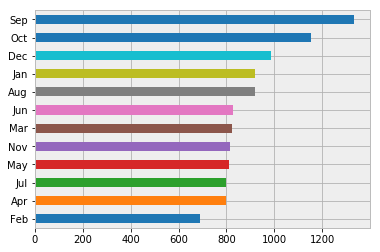

In [28]:
month_counts.plot(kind='barh')

# Budget vs Revenue 

/Users/poudel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Revenue')

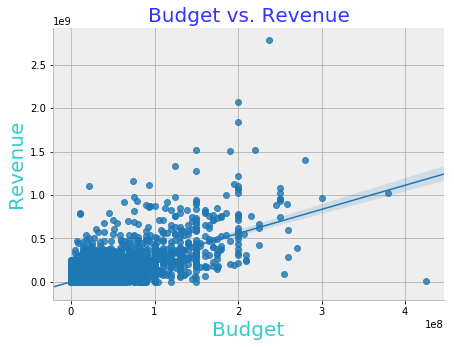

In [29]:
g = sns.regplot(x = 'budget', y='revenue' , data = df)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(7,5)

# Set the Title of the graph from here
g.axes.set_title('Budget vs. Revenue', fontsize=20,color="b",alpha=0.8)

# Set the x & y label of the graph from here
g.set_xlabel("Budget",size = 20,color="c",alpha=0.8)
g.set_ylabel("Revenue",size = 20,color="c",alpha=0.8)

> We can see that low budget movies have low revenue, except for some cases.

> There are few high budget movies with low revenues and vice versa.

> A lot of movies are low/medium budget with moderate revenue.


In [30]:
# Get valid budget and revenue
bud_rev = df.query('budget > 0 & revenue > 0')
bud_rev.shape

(3854, 15)

# Budget vs Rating

/Users/poudel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Budget vs Rating')

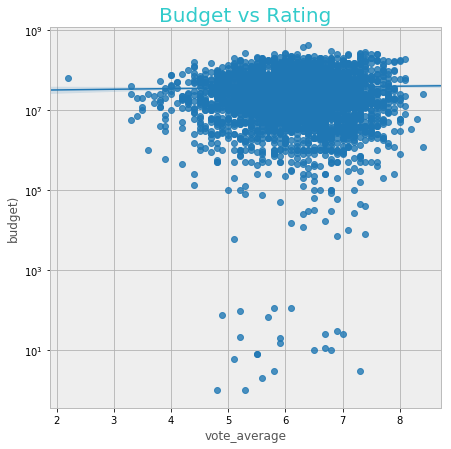

In [31]:
# Budget vs rating
import matplotlib.pyplot as plt
import seaborn as sns 

f, ax = plt.subplots(figsize=(7, 7))
ax.set( yscale="log")
p = sns.regplot('vote_average','budget', data =bud_rev, ax = ax, scatter = True)
p.set(ylabel='budget)')
p.axes.set_title('Budget vs Rating', fontsize=20,color="c",alpha=0.8)

> We can see a clear positive correlation that budget and ratings.

> We can see TMDB users like big budget movies.

# Number of movies per year

In [32]:
df.head(1)

,id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique,profit,release_month,month_name
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,Jurassic World by Colin Trevorrow,Jurassic World by Colin Trevorrow at 6/9/15,1363528810,6,Jun


/Users/poudel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Growth of movies production with years')

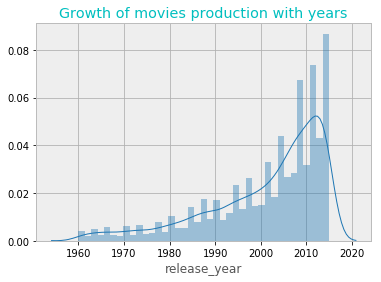

In [33]:
ax = sns.distplot(df['release_year'])
ax.set_title("Growth of movies production with years", color = 'c')

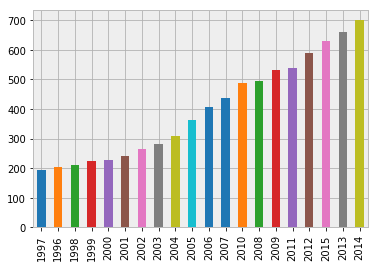

In [34]:
df.release_year.value_counts()[:20].sort_values().plot(kind='bar')



# Analyzing the Genre

In [35]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [36]:
nan_rows = df[df['genres'].isnull()]
nan_rows

,id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique,profit,release_month,month_name
424,363869,0,0,Belli di papÃ,Guido Chiesa,100,NaN,2015-10-29,6.1,2015,Belli di papÃ by Guido Chiesa,Belli di papÃ by Guido Chiesa at 10/29/15,0,10,Oct
620,361043,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,2015-10-06,5.0,2015,All Hallows' Eve 2 by Antonio Padovan|Bryan No...,All Hallows' Eve 2 by Antonio Padovan|Bryan No...,0,10,Oct
997,287663,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,2014-10-03,6.8,2014,Star Wars Rebels: Spark of Rebellion by Stewar...,Star Wars Rebels: Spark of Rebellion by Stewar...,0,10,Oct
1712,21634,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2009-02-27,7.4,2009,Prayers for Bobby by Russell Mulcahy,Prayers for Bobby by Russell Mulcahy at 2/27/09,0,2,Feb
1897,40534,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2009-02-27,7.0,2009,Jonas Brothers: The Concert Experience by Bruc...,Jonas Brothers: The Concert Experience by Bruc...,0,2,Feb
2370,127717,0,0,Freshman Father,Michael Scott,0,NaN,2010-06-05,5.8,2010,Freshman Father by Michael Scott,Freshman Father by Michael Scott at 6/5/10,0,6,Jun
2376,315620,0,0,Doctor Who: A Christmas Carol,NaN,62,NaN,2010-12-25,7.7,2010,NaN,NaN,0,12,Dec
2853,57892,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,2001-02-02,7.2,2001,Vizontele by YÄ±lmaz ErdoÄŸan,Vizontele by YÄ±lmaz ErdoÄŸan at 2/2/01,0,2,Feb
3279,54330,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,2008-08-13,6.1,2008,ì•„ê¸°ì™€ ë‚˜ by Kim Jin-Yeong,ì•„ê¸°ì™€ ë‚˜ by Kim Jin-Yeong at 8/13/08,0,8,Aug
4547,123024,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,2012-07-27,8.3,2012,London 2012 Olympic Opening Ceremony: Isles of...,London 2012 Olympic Opening Ceremony: Isles of...,0,7,Jul


In [37]:
# drop rows with nan genres
df = df.dropna(subset=['genres'])

In [38]:
nan_rows = df[df['genres'].isnull()]
nan_rows

,id,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,movie_name,movie_name_unique,profit,release_month,month_name


In [39]:
# Parse unique genre from all the movies
gen = []
for g in df['genres']:
    gg = g.split('|')
    gen = gen + gg
    gen = list(set(gen))
    
print(gen)

['Western', 'Crime', 'Family', 'History', 'Horror', 'Romance', 'Drama', 'Mystery', 'Fantasy', 'Action', 'Thriller', 'Music', 'Documentary', 'Foreign', 'Comedy', 'Science Fiction', 'TV Movie', 'Adventure', 'Animation', 'War']


In [40]:
df.genres.str.split('|', expand=True);

In [41]:
df.genres.str.split('|', expand=True).stack();

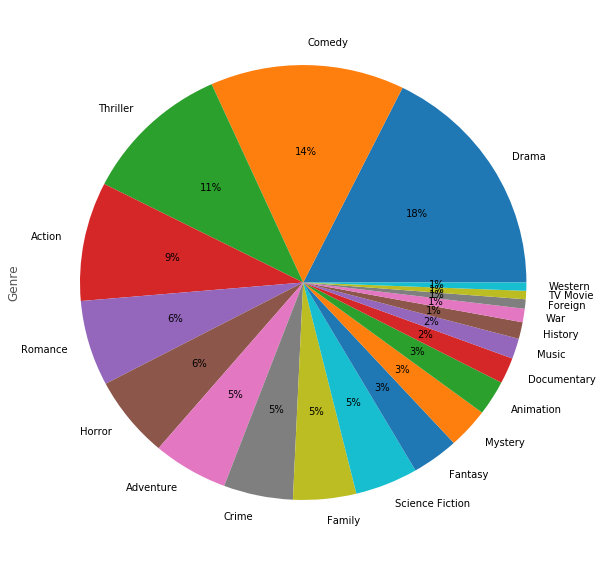

In [42]:
df.genres.str.split('|', expand=True).\
stack().\
value_counts().\
plot(kind='pie', label='Genre',figsize=(10,10), autopct='%1.0f%%')

# Genre vs budget

In [43]:
genres = (df.genres.str.split('|', expand=True)
            .stack()
            .to_frame(name='genre'))


genres.index = genres.index.droplevel(1)
print(df.shape, genres.shape)
genres.head()

(10842, 15) (26955, 1)


,genre
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action


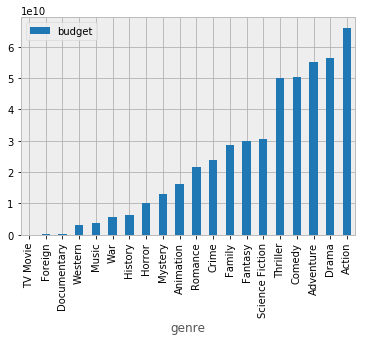

In [44]:
(genres.join(df['budget'])
       .groupby('genre')
       .sum()
       .sort_values(by='budget', ascending=True)
       .plot(kind='bar'))